# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing
import plotly.express as px


In [2]:
# Load the data
sample_df = pd.read_csv('sample_botnet_df_v2.csv')

## Encoding categorical features

In [3]:
# Convert Device name to numerical
le = preprocessing.LabelEncoder()
sample_df['Device_Name'] = le.fit_transform(sample_df['Device_Name'])
sample_df['Attack'] = le.fit_transform(sample_df['Attack'])
sample_df['Attack_subType'] = le.fit_transform(sample_df['Attack_subType'])

print('-'*10, 'DATA TYPES', '-'*10)
print(sample_df.dtypes)
print('\n')

print('Device_Name:', sample_df['Device_Name'].unique())
print('Attack:', sample_df['Attack'].unique())
print('Attack_subType:', sample_df['Attack_subType'].unique())

---------- DATA TYPES ----------
MI_dir_L0.1_weight      float64
MI_dir_L0.1_mean        float64
MI_dir_L0.1_variance    float64
H_L0.1_weight           float64
H_L0.1_mean             float64
H_L0.1_variance         float64
HH_L0.1_weight          float64
HH_L0.1_mean            float64
HH_L0.1_std             float64
HH_L0.1_magnitude       float64
HH_L0.1_radius          float64
HH_L0.1_covariance      float64
HH_L0.1_pcc             float64
HH_jit_L0.1_weight      float64
HH_jit_L0.1_mean        float64
HH_jit_L0.1_variance    float64
HpHp_L0.1_weight        float64
HpHp_L0.1_mean          float64
HpHp_L0.1_std           float64
HpHp_L0.1_magnitude     float64
HpHp_L0.1_radius        float64
HpHp_L0.1_covariance    float64
HpHp_L0.1_pcc           float64
Device_Name               int64
Attack                    int64
Attack_subType            int64
label                     int64
dtype: object


Device_Name: [7 5 3 6 4 1 8 0 2]
Attack: [2 1 0]
Attack_subType: [1 6 5 0 4 7 8 2 3]


# Feature Correlation Analysis

---------- CORRELATION ----------


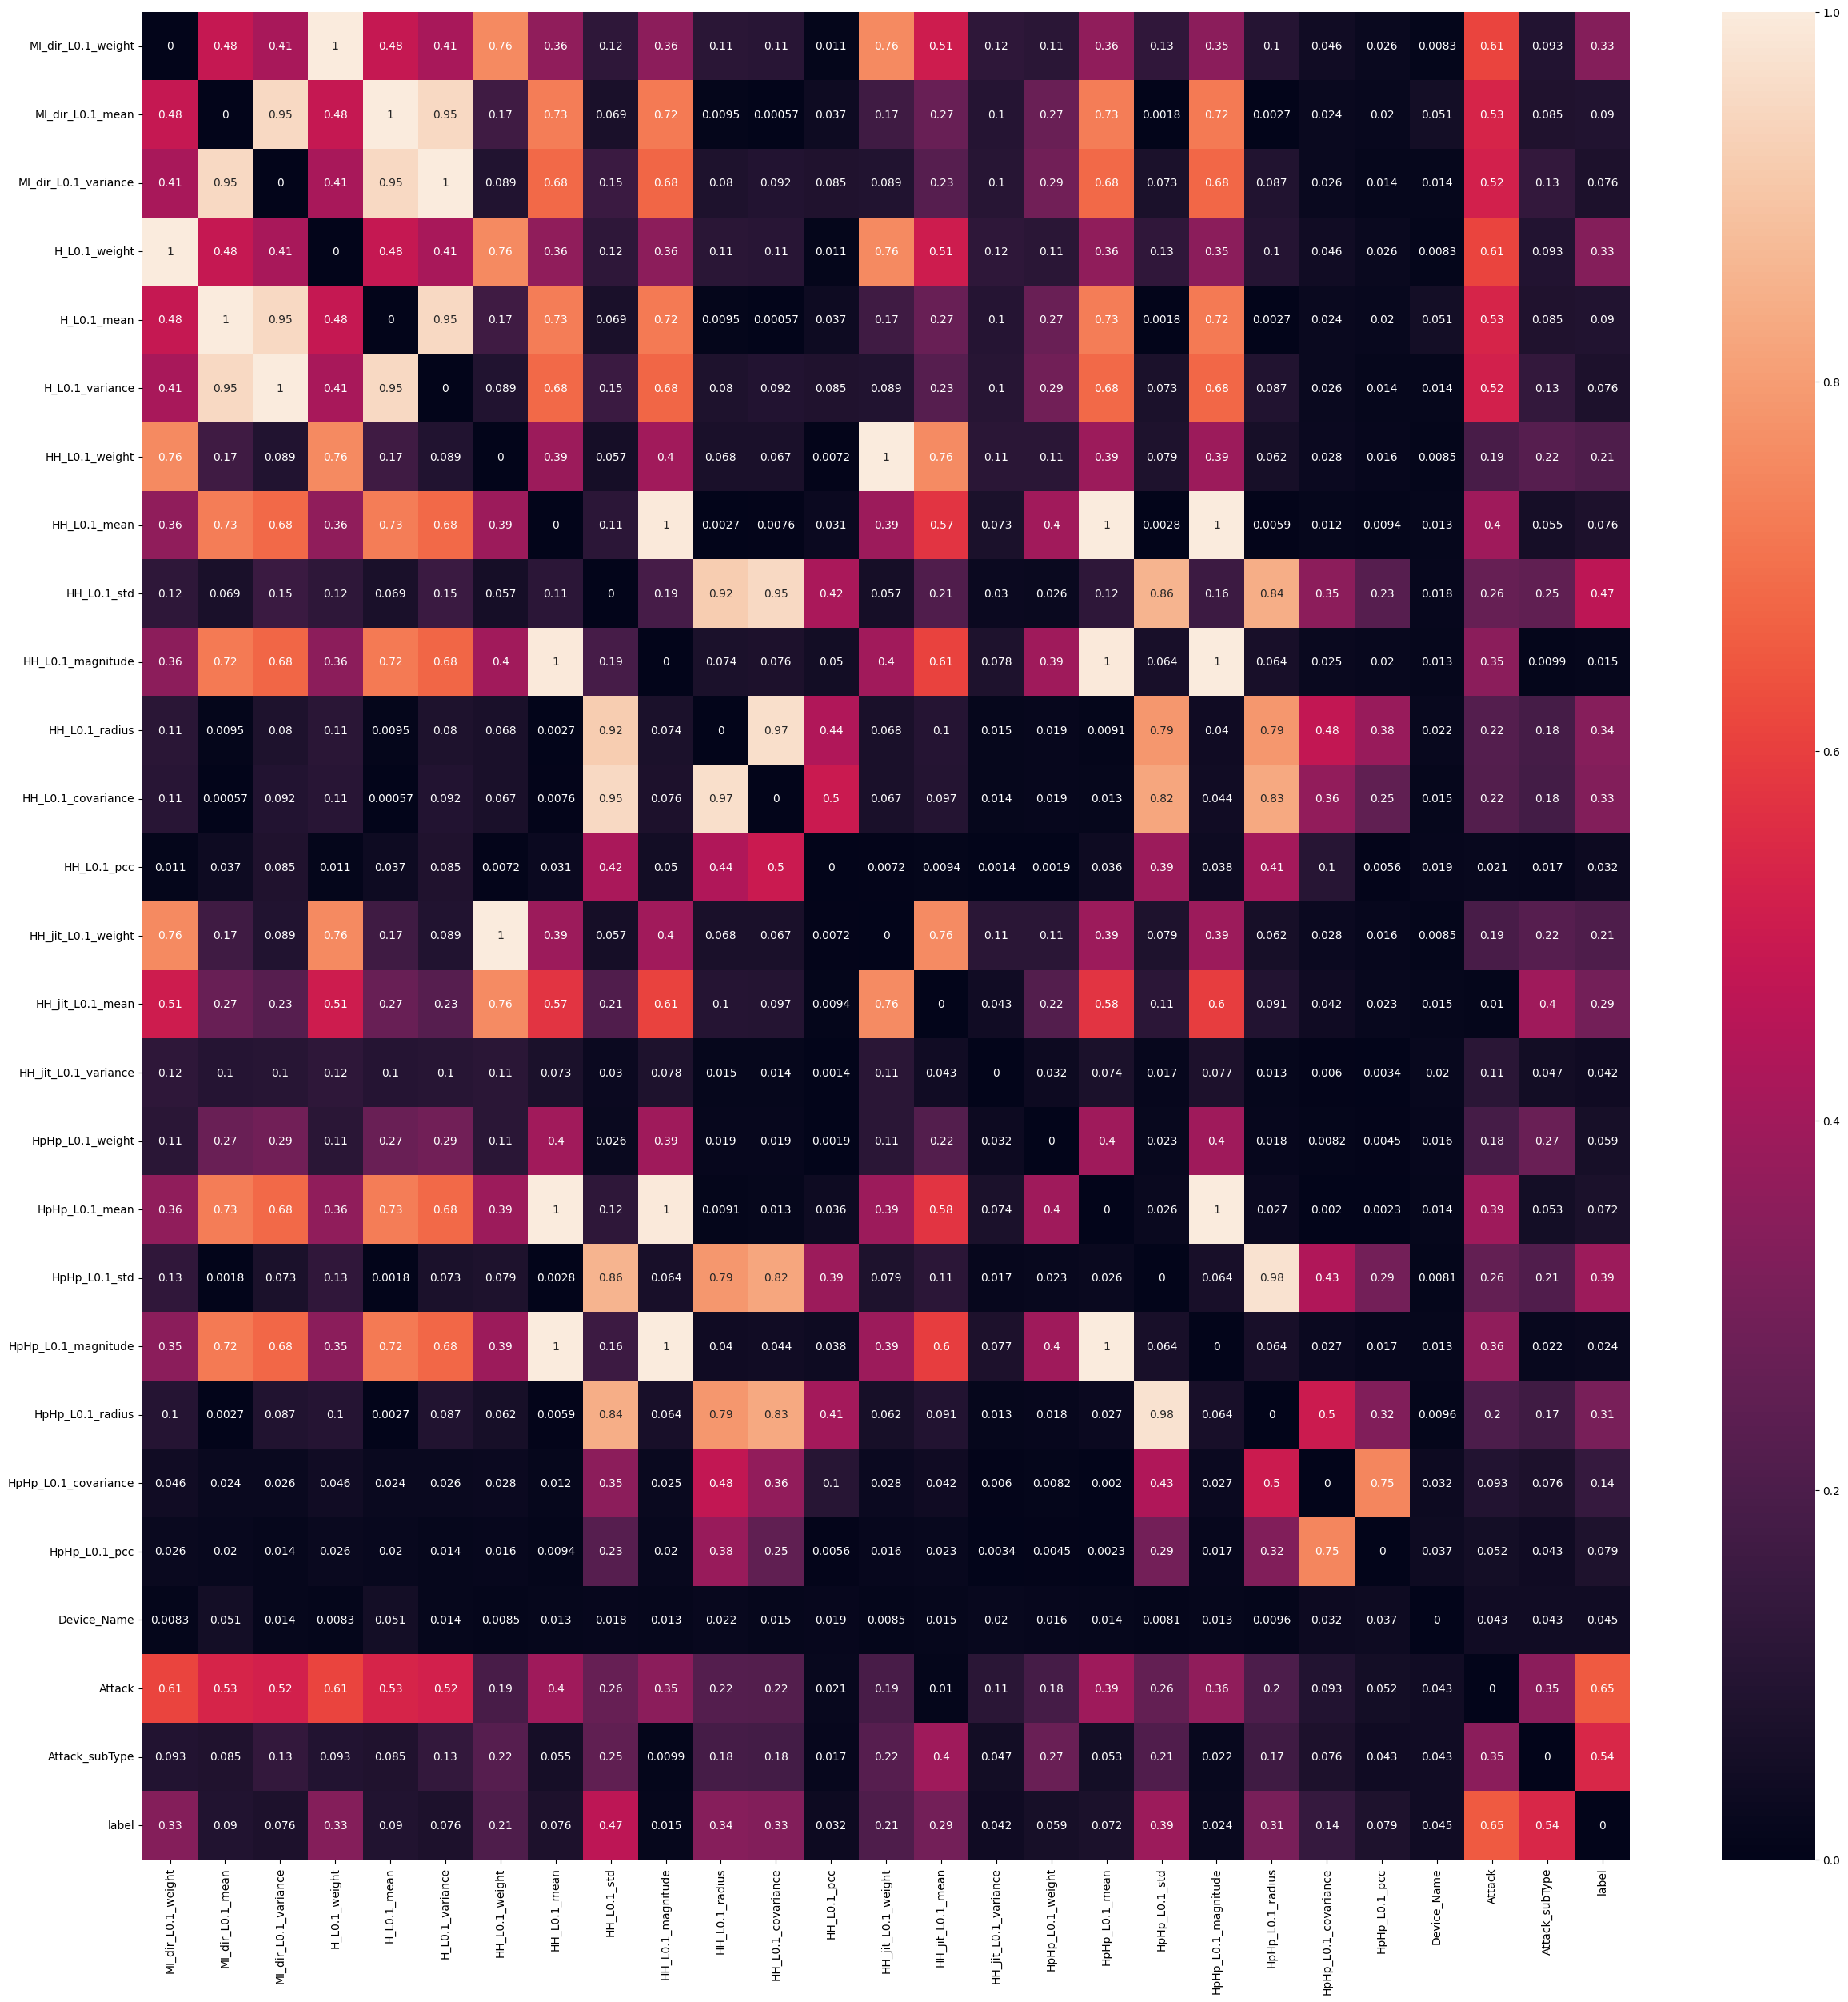

In [24]:
# Correlation analysis
print('-'*10, 'CORRELATION', '-'*10)
corr = sample_df.corr().abs()
np.fill_diagonal(corr.values, 0)  # Exclude self-correlation

most_correlated_pair = corr.unstack().idxmax()
max_correlation = corr.max().max()
high_corr_pairs = corr[corr == max_correlation].stack().index.tolist()

feature_x, feature_y = most_correlated_pair

# print(corr)
# print('\n')

# Heatmap
plt.figure(figsize=(30,30))
sns.heatmap(corr, annot=True)
plt.show()

## Visualize data distribution, especially label and Attack_subType.

---------- DATA DISTRIBUTION ----------


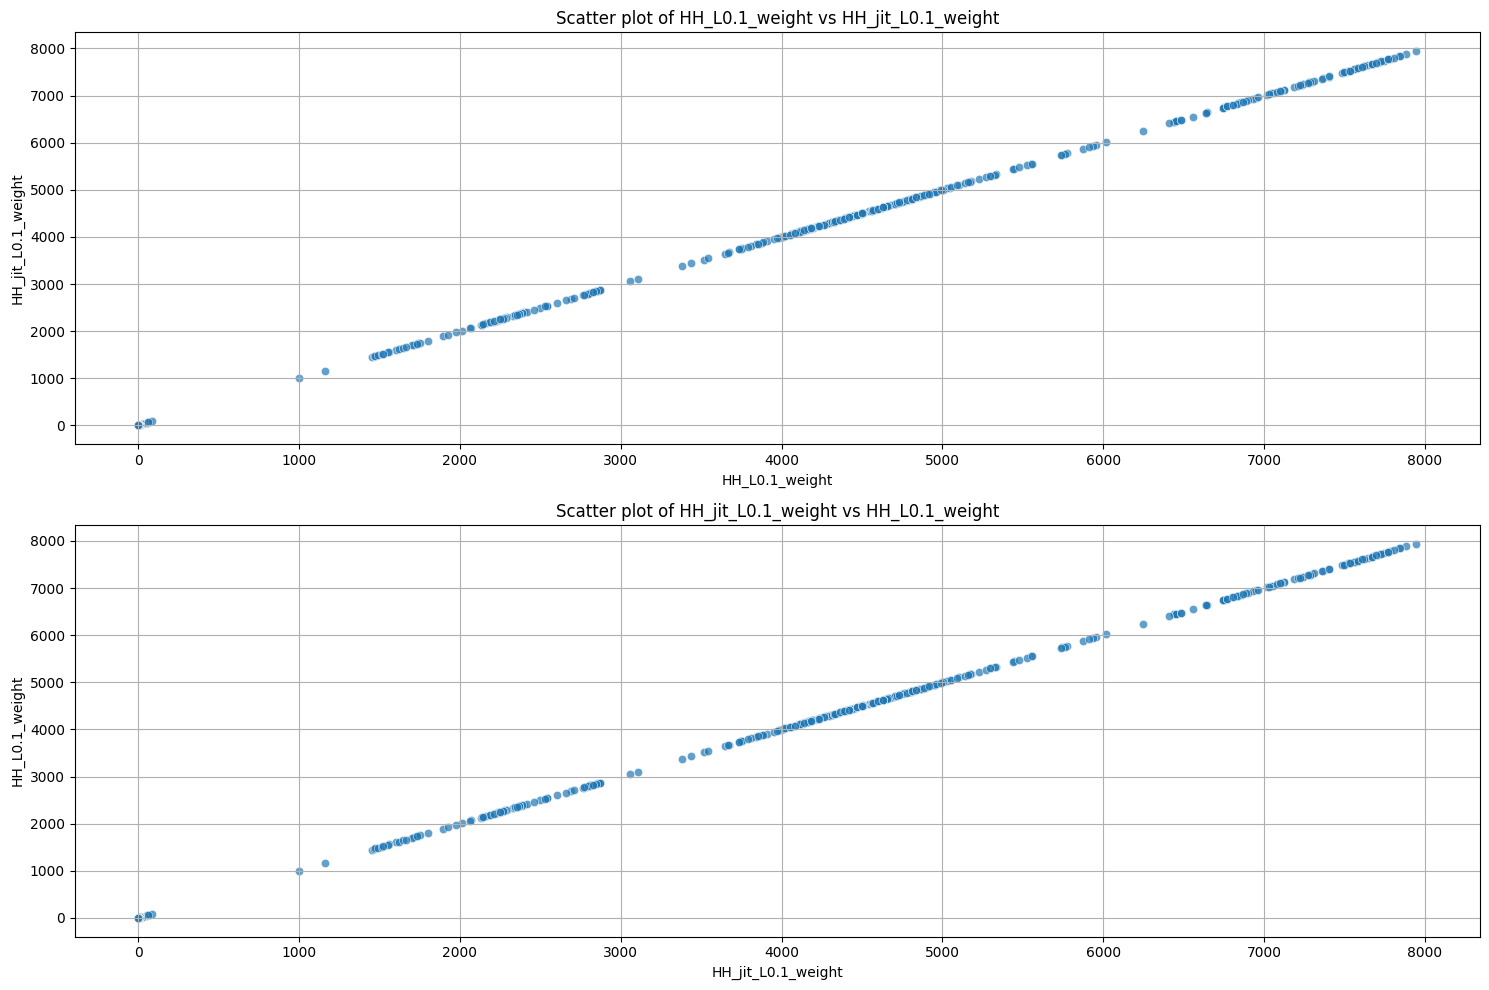

In [ ]:
print('-'*10, 'DATA DISTRIBUTION', '-'*10)
# plt.figure(figsize=(20,20))
# sns.pairplot(sample_df)
# plt.show()

#MI_dir_L0.1_weight,MI_dir_L0.1_mean,MI_dir_L0.1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,HH_L0.1_weight,HH_L0.1_mean,HH_L0.1_std,HH_L0.1_magnitude,HH_L0.1_radius,HH_L0.1_covariance,HH_L0.1_pcc,HH_jit_L0.1_weight,HH_jit_L0.1_mean,HH_jit_L0.1_variance,HpHp_L0.1_weight,HpHp_L0.1_mean,HpHp_L0.1_std,HpHp_L0.1_magnitude,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,Device_Name,Attack,Attack_subType,label

# Scatter the features with most correlation
plt.figure(figsize=(15, 5 * len(high_corr_pairs)))
for i, (feature_x, feature_y) in enumerate(high_corr_pairs, start=1):
    plt.subplot(len(high_corr_pairs), 1, i)
    sns.scatterplot(data=sample_df, x=feature_x, y=feature_y, alpha=0.7)
    plt.title(f'Scatter plot of {feature_x} vs {feature_y}')
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.grid(True)

plt.tight_layout()
plt.show()

## Feature and Target Selection

## Split Dataset

## Feature Scaling